# SPRINT 8: Algoritmos de aprendizaje no supervisado - Agrupación

## Objetivos:
- Limpieza e interpretación de datos
- Preprocesado
- Encontrar número de clusters óptimos
- Creación de modelos no supervisados (k-means y clustering jerárquico)
- Interpretación de resultados

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats

df=pd.read_csv('Publicacions Facebook Thailandia.csv', sep=',', encoding='latin-1')
df

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


Valores de las columnas:
- Status id: Id de lo que se compartió
- Status type: Tipo de archivo que se compartió
- Status published: Fecha y hora de la publicación
- Num reactions: N° de reacciones a la publicación
- Num comentarios
- Num shares: N° de veces compartida
- Num likes
- Num de reacción love
- Num de reacción wow
- Num de reacción risa
- Num reacción triste
- Num reacción enojado

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿status_id      7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
df.dtypes

ï»¿status_id         object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [5]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum().sort_values(ascending = False)

Column1             7050
Column2             7050
Column3             7050
Column4             7050
ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending = False)

Column1             7050
Column2             7050
Column3             7050
Column4             7050
ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
dtype: int64

Podemos ver, como las column 1, 2, 3 y 4 no presentan valores, por lo que procedemos a borrarlas

In [8]:
df2=df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1)
df2

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


Otra modificación que haremos será con la variable status_type, la transformaremos a dummy para poder interpretarlas por separado y facilitar su visualización y evaluación:

In [9]:
dummies = pd.get_dummies(df['status_type'])
df_def = pd.concat([df2, dummies], axis=1)

Eliminamos las columnas: 'status id' ya que en este caso no nos sirve diferenciar por id, la variable 'status_type' porque ya la hemos pasado a dummy y la 'status_published' que tiene los datos de fecha y hora de publicación, que son interesantes, pero en este caso que queremos hacer clustering y necesitamos únciamente variables númericas no nos hacen falta.

In [10]:
df_def=df_def.drop(columns=['ï»¿status_id', 'status_type', 'status_published'], axis=1)

In [11]:
df_def.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'link', 'photo',
       'status', 'video'],
      dtype='object')

Verificamos que variables presentan outliers, a partir de sus gráficas de box-plot.
Esto lo haremos apra saber como proceder con su preprocesamiento.

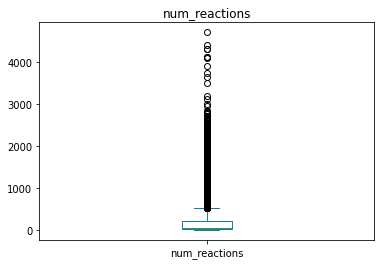

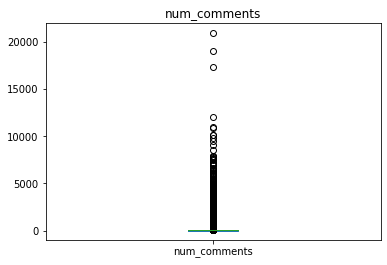

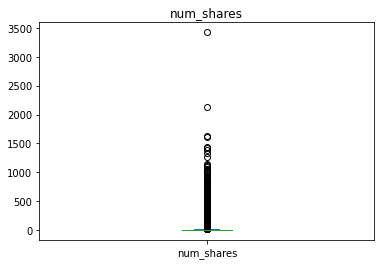

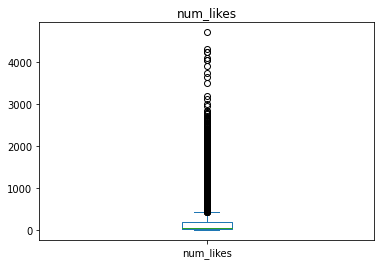

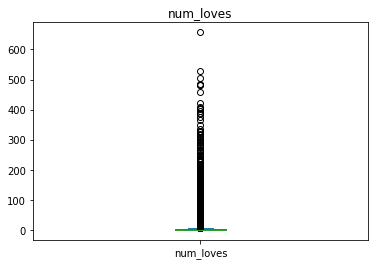

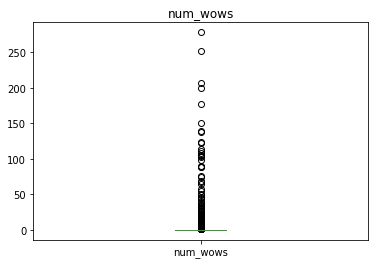

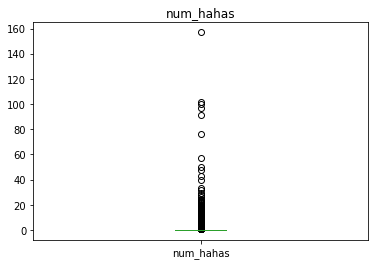

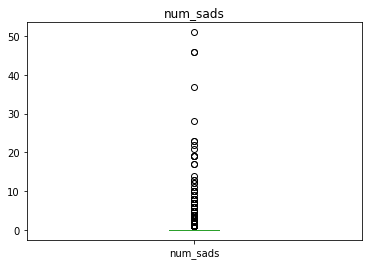

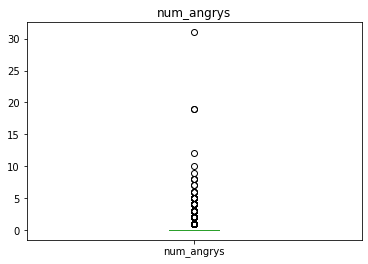

In [12]:
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

for column in cols:
    plt.figure()
    df[column].plot.box()
    plt.title(column)
    plt.show()

Podemos ver como todas las variables presentan outliers.

Aplico **robust scaler** para las variables: 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', ya que presentan gran cantidad de outliers.

In [13]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_def [['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']] = scaler.fit_transform(df_def[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']])

df_def

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
7046,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,0,1,0,0
7047,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,0,1,0,0
7048,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,0,1,0,0


In [14]:
df_def.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.844639,9.580697,10.005638,0.936174,4.242884,1.289362,0.696454,0.243688,0.113191,0.008936,0.608227,0.051773,0.331064
std,2.290224,38.679862,32.899991,2.679418,13.324310,8.719650,3.957183,1.597156,0.726812,0.094115,0.488181,0.221584,0.470629
min,-0.294554,-0.173913,0.000000,-0.345753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.210396,-0.173913,0.000000,-0.244411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.789604,0.826087,1.000000,0.755589,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,23.022277,912.434783,856.000000,27.731744,219.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_def.dtypes

num_reactions    float64
num_comments     float64
num_shares       float64
num_likes        float64
num_loves        float64
num_wows         float64
num_hahas        float64
num_sads         float64
num_angrys       float64
link               uint8
photo              uint8
status             uint8
video              uint8
dtype: object

### Exercici 1

#### Clasifica los diferentes registros utilizando el algoritmo de K-means

Para saber cuantos clusters son correctos para poder realizar la K-means realizamos el método de **"Elbow Method"**. Este método se basa en la observación de la variación de la suma de las distancias al cuadrado de los puntos a su centroide más cercano en función del número de clusters.

Antes de hacer el Elbow Method, hacemos **PCA** (Principal Component Analysis, Análisis de Componentes Principales) es una técnica de análisis multivariante que se utiliza para identificar patrones en datos de alta dimensionalidad. Sirve para encontrar las dimensiones principales de los datos, lo que puede ser útil para reducir la dimensionalidad de los datos y visualizarlos en un espacio de menor dimensión. El PCA también puede ayudar a identificar patrones y relaciones entre las variables en los datos.

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [17]:
!pip install kneed


[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0, 0.5, 'Varianza acumulada explicada')

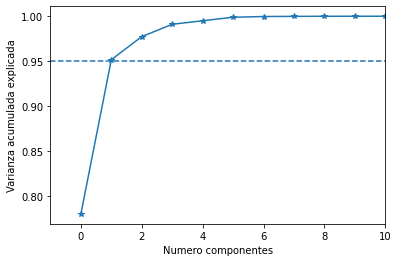

In [18]:
from kneed import KneeLocator

pca = PCA().fit(df_def)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "*")
plt.axhline(0.95, linestyle = '--')
plt.xlim([-1,10])
plt.xlabel('Numero componentes')
plt.ylabel('Varianza acumulada explicada')

In [19]:
pca = PCA(.95).fit(df_def)
print(pca.n_components_)

2


Ahora que ya tenemos la cantidad óptima de clusters, los realizamos:

In [20]:
# Crear el objeto KMeans con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con el DataFrame df_def
kmeans.fit(df_def)

# Obtener las etiquetas de los clusters para cada fila del DataFrame
labels = kmeans.predict(df_def)

# Imprimir las etiquetas
print(labels)

C:\Users\flore\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


In [27]:
df_cluster = df_def.copy()

df_cluster['Cluster K-means'] = labels
df_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,Cluster K-means
0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,0
1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
2,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0
3,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
4,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0


In [28]:
df_cluster['Cluster K-means'].value_counts()

0    6741
1     309
Name: Cluster K-means, dtype: int64

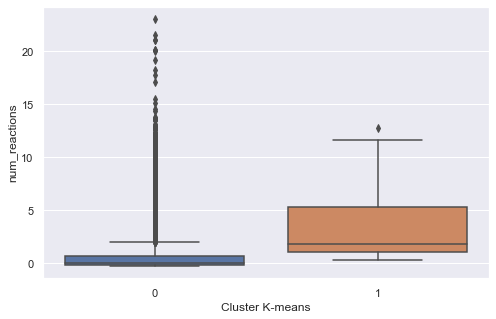

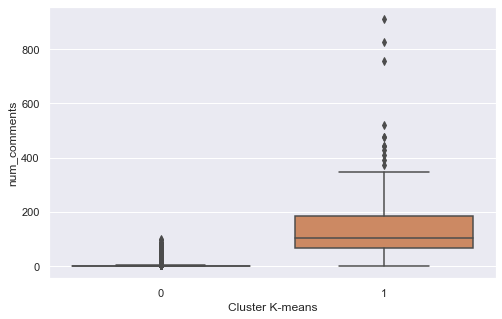

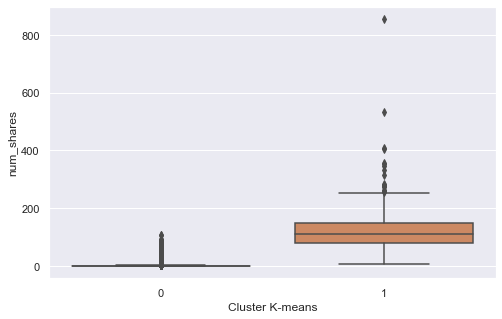

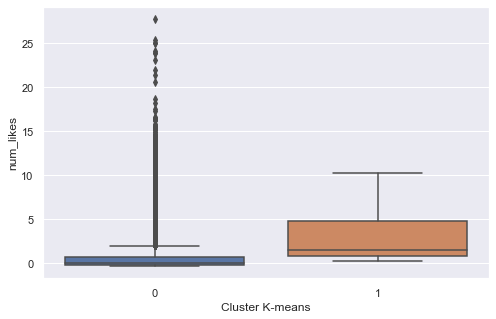

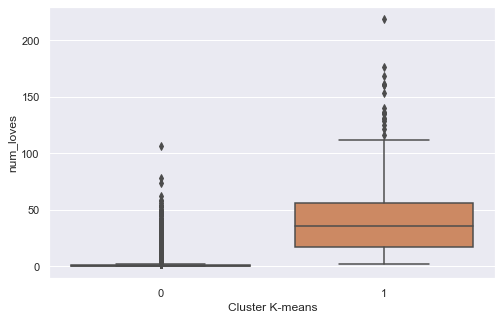

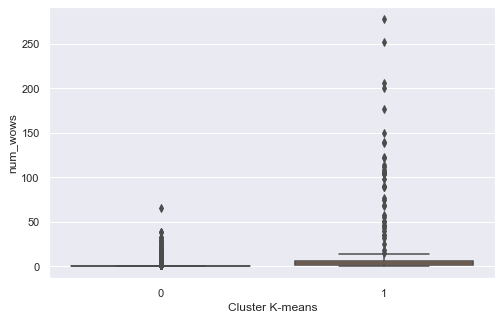

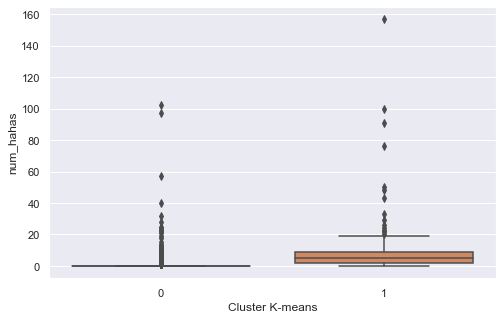

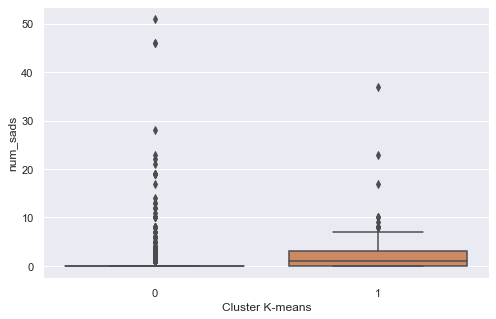

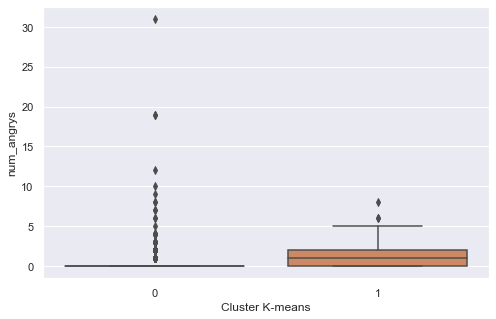

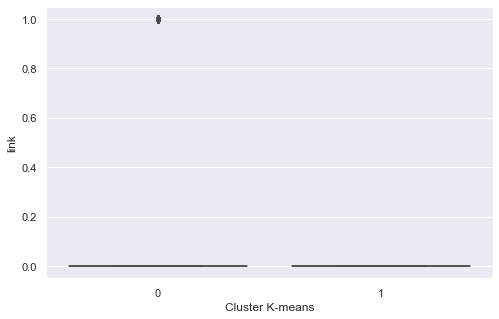

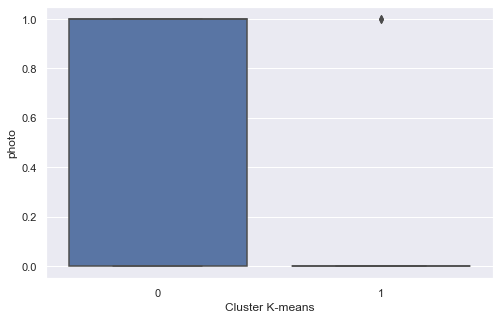

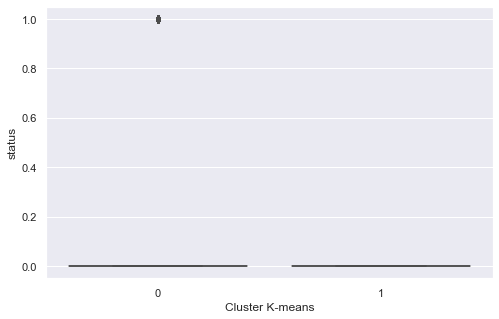

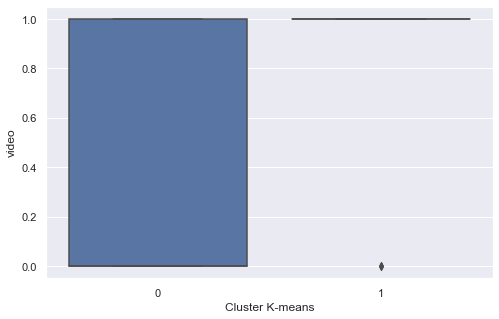

In [36]:
columns = df_cluster.columns[:-1]

for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster K-means', y=i, data=df_cluster)


- **Cluster 0:** Videos y fotos
- **Cluster 1:** Con mas comentarios, más likes, mas reacciones en general (hahaha, loves, angrys)

## Exercici 2

#### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [38]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

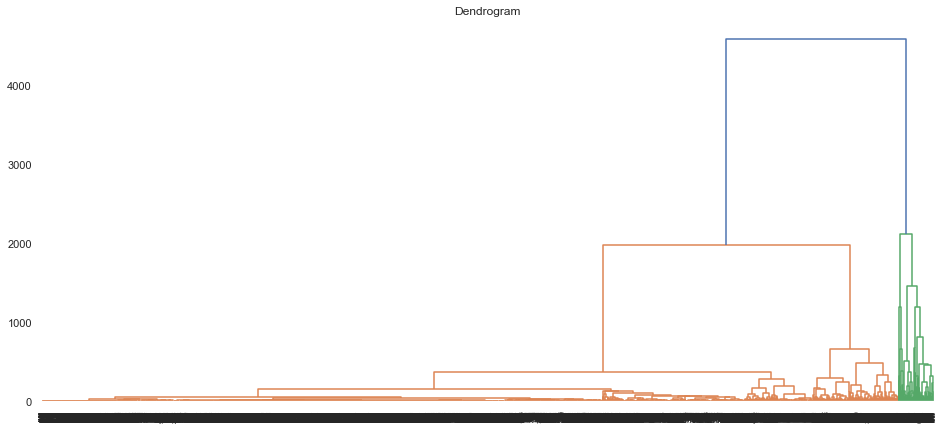

In [39]:
plt.figure(figsize = (16, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(df_cluster, method = "ward"))
plt.show()

El dendrograma nos representa 2 clusters (primera división azu), igual que nos da el K-means, por lo que coinciden

In [40]:
aglom = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aglom.fit(df_cluster)

predicts_aglo = aglom.labels_

predicts_aglo

C:\Users\flore\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
df_cluster['Cluster Agglomerative'] = predicts_aglo
df_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,Cluster K-means,Cluster Agglomerative
0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,0,1
1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,1
2,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0,1
3,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,1
4,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,1


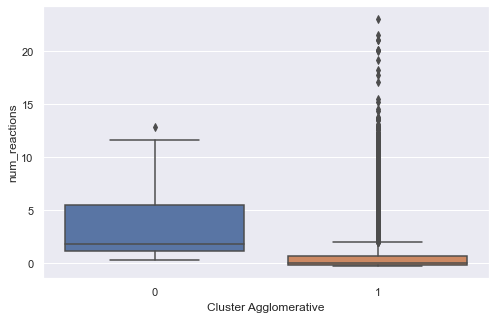

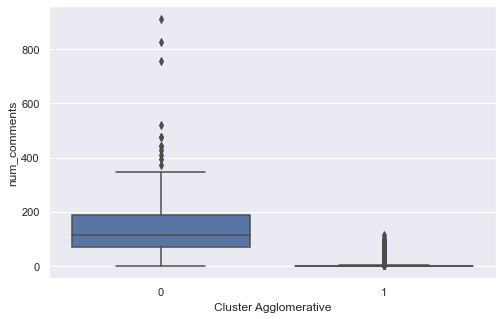

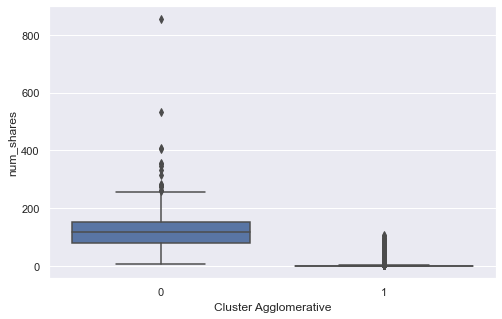

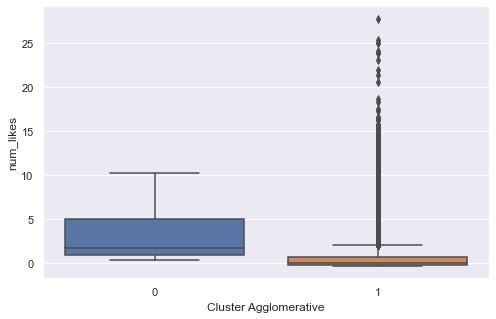

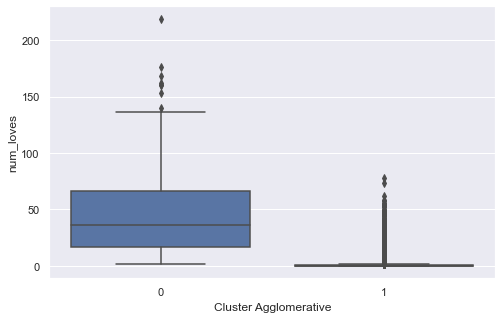

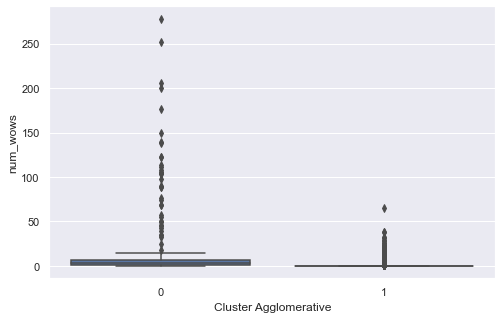

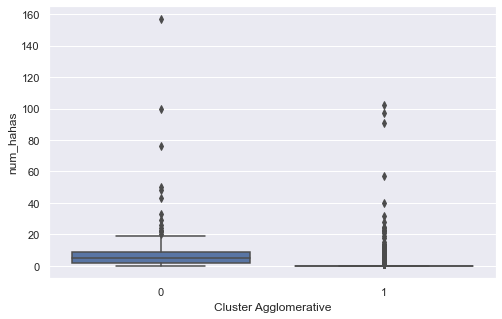

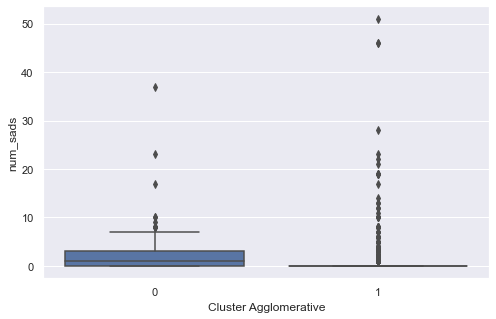

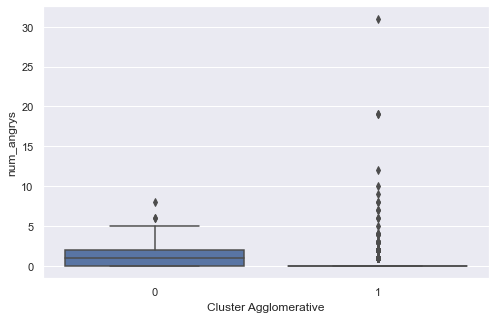

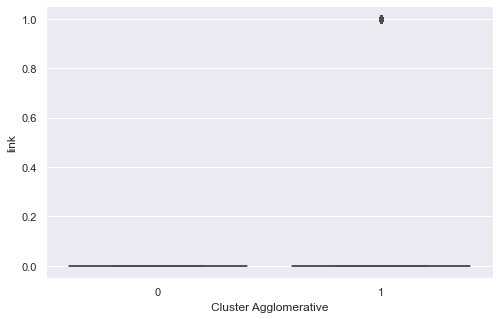

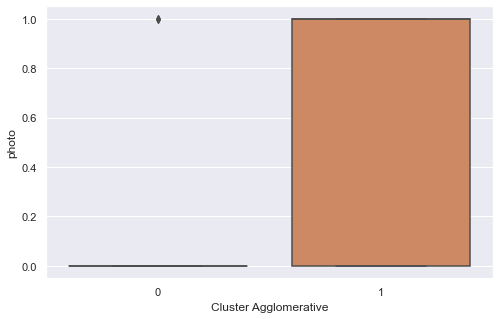

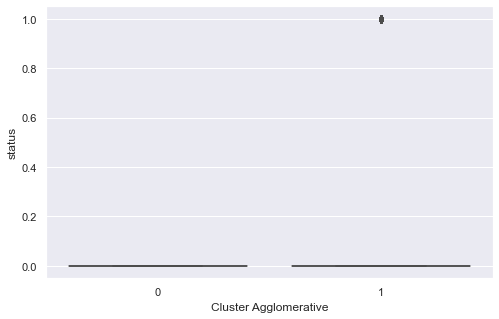

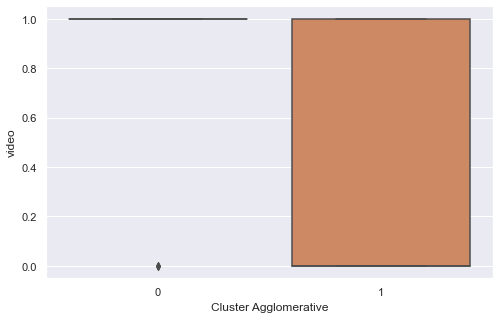

In [42]:
columns_aglo = df_cluster.columns[:-2]
   
for i in columns_aglo:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster Agglomerative', y=i, data=df_cluster)

## Exercici 3

#### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

El **Silhouette Score** es una métrica utilizada para evaluar la calidad de un clustering. Esta métrica mide cuán similar es un registro con su propio cluster en comparación con los demás clusters.

Tiene un rango de valores entre -1 y 1. Un valor de 1 indica que los registros están muy próximos a los registros de su propio cluster y muy alejados de los registros de los demás clusters, lo que indica una buena calidad de clustering. Un valor de 0 indica que los registros están en la frontera entre dos clusters, mientras que un valor negativo indica que los registros están más próximos a los registros de otro cluster que a los de su propio cluster, lo que indica una mala calidad de clustering.

In [44]:
from sklearn.metrics import silhouette_score

In [47]:
score_km = silhouette_score(df_cluster, labels, metric='euclidean')

score_aglo = silhouette_score(df_cluster, predicts_aglo, metric='euclidean')

In [48]:
score_km

0.8892568499677126

In [51]:
score_aglo

0.8917391806890405

Podemos ver como los valores se aproximan a 1 en ambos casos, por lo que nos están dando bien, no hay mucha diferencia entre ellos, pero si tuviesemos que elegir, nos quedaríamos con K-means